In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Dataset .csv')

# Data Preprocessing

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [4]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
np.array(data['Cuisines'])
data.iloc[:,9:10]

,Cuisines
0,"French, Japanese, Desserts"
1,Japanese
2,"Seafood, Asian, Filipino, Indian"
3,"Japanese, Sushi"
4,"Japanese, Korean"
...,...
9546,Turkish
9547,"World Cuisine, Patisserie, Cafe"
9548,"Italian, World Cuisine"
9549,Restaurant Cafe


In [6]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

imputer.fit(data.iloc[:,9:10].values)
data.iloc[:,9:10] = imputer.transform(data.iloc[:,9:10].values)
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Content-based Restaurant Recommendation Filtering

In [8]:
print(" ||                  Criterias Available                || \n \n")
for cols in data.columns:
    print(cols)
    
preference = input("Enter the Recommendation Criteria from the following:    ").strip()

value = input(f"Enter the {preference} value:    ").strip()


# Vectorize the specified preference column
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data[preference])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


# Create a Series to map values in the preference column to their indices
indices = pd.Series(data.index, index=data[preference]).drop_duplicates()

def get_recommendations(title, cosine_sim = cosine_sim):
    if title not in indices:
        print(f"No restaurant found with the preference {title}")
        return
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sim_scores[1:11]  #Top 10 restaurants
    similarity_scores = [i[1] for i in sim_scores]
    similarity_scores = [score[0] for score in similarity_scores]
    sim_index = [i[0] for i in sim_scores]
    
    recommended_restaurants = data['Restaurant Name'].iloc[sim_index]
    recommended_ratings = data[data['Restaurant Name'].isin(recommended_restaurants)]['Aggregate rating']

    print('|| THE TOP 10 RECOMMENDED RESTRAUNTS BASED ON THE PROVIDED CRITERIA || \n\n')
    print(recommended_restaurants)
    return recommended_restaurants, recommended_ratings
    
recommended_restaurants, recommended_ratings = get_recommendations(value)


 ||                  Criterias Available                || 
 

Restaurant ID
Restaurant Name
Country Code
City
Address
Locality
Locality Verbose
Longitude
Latitude
Cuisines
Average Cost for two
Currency
Has Table booking
Has Online delivery
Is delivering now
Switch to order menu
Price range
Aggregate rating
Rating color
Rating text
Votes
Enter the Recommendation Criteria from the following:    Cuisines
Enter the Cuisines value:    Seafood
|| THE TOP 10 RECOMMENDED RESTRAUNTS BASED ON THE PROVIDED CRITERIA || 


1                             Izakaya Kikufuji
2                       Heat - Edsa Shangri-La
3                                         Ooma
4                                  Sambo Kojin
5                                 Din Tai Fung
6                                   Buffet 101
7                                      Vikings
8     Spiral - Sofitel Philippine Plaza Manila
9                                     Locavore
10                            Silantro Fil-Mex
Name: Restaur

## Analyzing the Model's Results

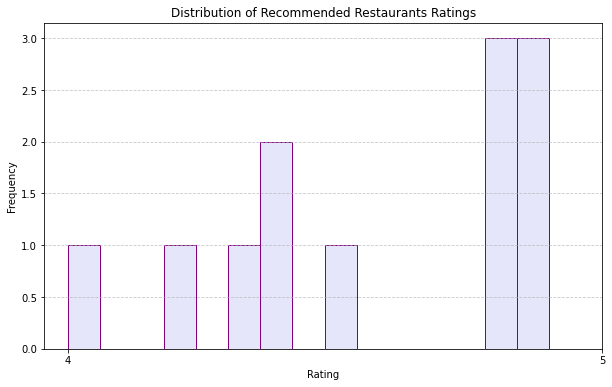

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(recommended_ratings, bins=15, color='lavender', edgecolor='purple')
plt.title('Distribution of Recommended Restaurants Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(4, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()